# Gold prediction with Random Forest Regression

In [70]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [71]:
import kaggle 

kaggle.api.authenticate()
kaggle.api.dataset_download_files('altruistdelhite04/gold-price-data', path='./', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data


In [72]:
# read the data
gold_data = pd.read_csv('gold_price_data.csv')

In [73]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


**spx is the stock price of the S&P 500 index**

**gold is the price of gold**


**uso is the price of uinited states oil**

**slv is the price of silver**

**eur/usd is the exchange rate of eur to usd**

In [74]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [75]:
# ckecl the missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [76]:
gold_data.shape

(2290, 6)

In [77]:
# desctbe the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [78]:
gold_data1 = gold_data.drop(['Date'], axis=1)

In [79]:
# fing the correlation between the columns
correlation = gold_data1.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

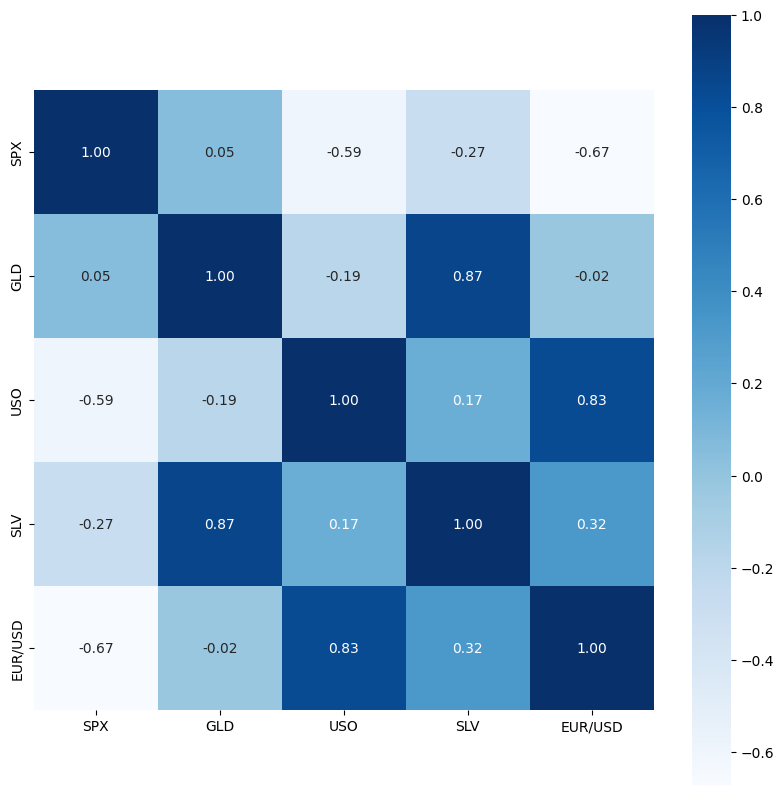

In [80]:
# plot the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='Blues')

In [81]:
# correlation values
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


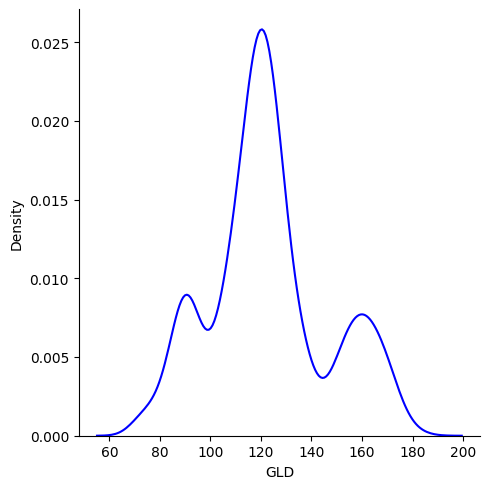

In [82]:
# distribution of the data
sns.displot(gold_data1['GLD'], kind='kde', color='b')

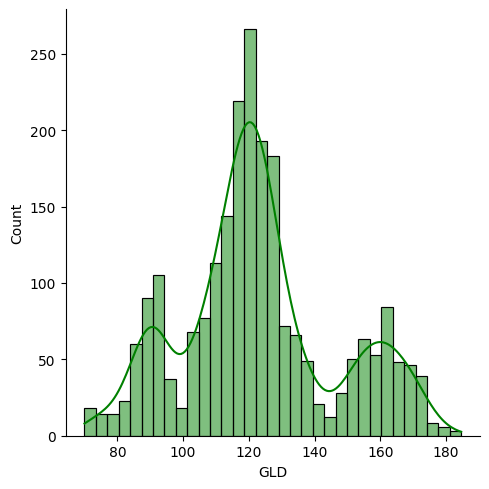

In [83]:
sns.displot(gold_data1['GLD'], kind='hist', kde=True, color='g')

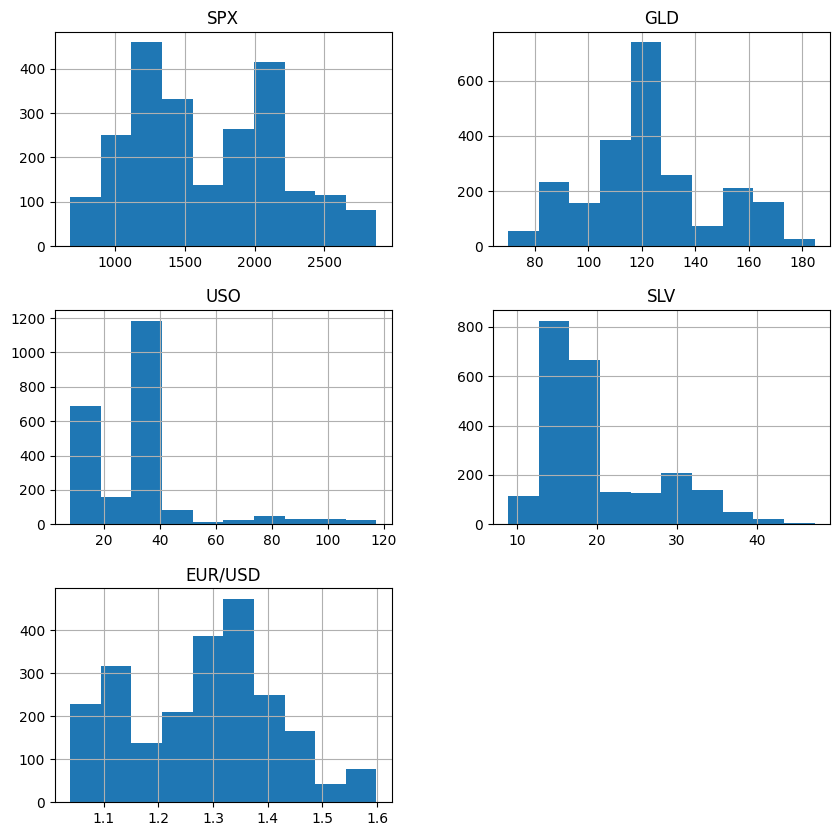

In [84]:
# distribution of the data
gold_data1.hist(figsize=(10,10))
plt.show()
# mark label for the data


In [85]:
gold_data1.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [86]:
# sepperate the gold column from the other columns
X = gold_data1.drop(['GLD'], axis=1)
Y = gold_data1['GLD']

In [87]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [88]:
Y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [89]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [90]:
# shape of the data
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(2290, 4) (1832, 4) (458, 4)
(2290,) (1832,) (458,)


In [91]:
# model training
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)

RandomForestRegressor()

In [92]:
# predictions of test data
Y_predictions = model.predict(X_test)


In [93]:
print(Y_predictions)

[168.69559978  82.0139998  115.98820023 127.30260074 120.69390127
 154.76449749 150.53739843 126.07350014 117.54379853 125.81150115
 116.58800123 171.87020065 141.48729926 167.97559829 115.26119998
 117.51840026 138.30710343 170.0642005  158.85290289 156.17189957
 155.18450039 125.17660052 175.90009962 156.91530352 125.2330005
  93.87259996  77.44590028 120.33910006 119.13449932 167.5188
  88.06000019 125.23719978  91.19250138 117.65310026 121.1697991
 136.15420065 115.42160121 115.43550084 147.98650046 106.96900104
 104.01310235  87.26909792 126.48580029 117.94220019 154.24969881
 119.54570018 108.35190009 107.88519832  93.22260063 127.03119803
  75.34700026 113.68799956 121.39609995 111.2051989  118.85579864
 120.37859938 159.1507     166.61260031 147.02899701  85.63229857
  94.35200034  86.75259911  90.60610028 118.85100043 126.3828005
 127.56319984 169.35679989 122.32359916 117.45609889  98.56810032
 167.97780125 142.99079828 131.69210206 121.29150234 120.55929973
 119.73460051 114

In [94]:
# R squared value
r2 = metrics.r2_score(Y_test, Y_predictions)
print(r2)

0.9888013302361113


In [95]:
print(Y_test)

903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
           ...    
923     166.380005
1693    106.379997
2054    122.239998
658     133.830002
376     102.360001
Name: GLD, Length: 458, dtype: float64


In [99]:
# convert the Y_test to list
Y_test = list(Y_test)
print(Y_test)

[168.020004, 81.230003, 112.32, 127.589996, 119.620003, 154.210007, 148.910004, 126.190002, 117.470001, 125.739998, 115.379997, 167.119995, 141.630005, 169.559998, 115.599998, 119.669998, 132.949997, 170.399994, 159.369995, 173.529999, 154.720001, 128.119995, 177.720001, 157.190002, 125.309998, 93.400002, 76.790001, 119.690002, 118.989998, 167.389999, 87.5, 124.980003, 91.230003, 115.489998, 120.949997, 133.809998, 116.690002, 113.809998, 133.580002, 105.970001, 105.120003, 87.959999, 126.82, 116.860001, 159.259995, 119.459999, 109.160004, 108.620003, 93.269997, 127.160004, 72.260002, 113.470001, 119.68, 109.139999, 119.309998, 120.050003, 159.889999, 161.490005, 146.740005, 85.809998, 93.709999, 85.550003, 91.029999, 118.489998, 126.449997, 126.980003, 171.699997, 122.400002, 116.410004, 97.959999, 169.630005, 142.639999, 131.809998, 121.360001, 124.0, 119.699997, 113.889999, 118.919998, 105.639999, 127.669998, 114.32, 107.309998, 114.82, 119.230003, 86.860001, 87.010002, 147.729996, 

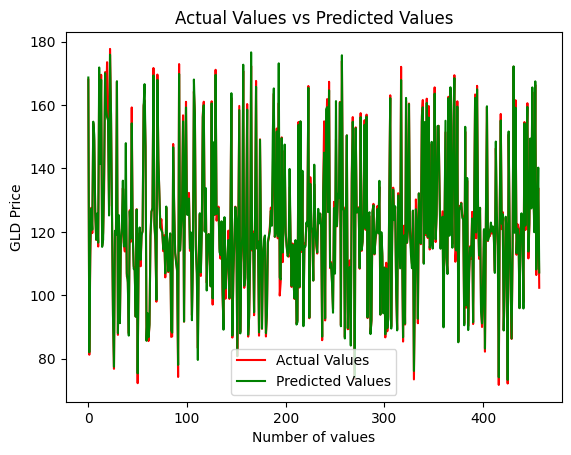

In [97]:
# plot thr actual values and predicted values
plt.plot(Y_test, color = 'red', label = 'Actual Values')
plt.plot(Y_predictions, color = 'green', label = 'Predicted Values')
plt.title('Actual Values vs Predicted Values')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()

In [98]:
# Check data types
print(type(Y_test))
print(type(Y_predictions))

# Check lengths
print(len(Y_test))
print(len(Y_predictions))

<class 'list'>
<class 'numpy.ndarray'>
458
458
